<a href="https://colab.research.google.com/github/dax44/OvfSim/blob/main/Toyota_NN_Try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, InputLayer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import random
from sklearn.metrics import confusion_matrix
import imblearn

# LOAD DATA

In [ ]:
data_raw = pd.read_csv("/content/drive/MyDrive/Data/toyota_data.csv")

In [ ]:
data_raw

,Unnamed: 0,przplywo1cfg,przplywo2cfg,przplywo3cfg,przplywo4cfg,przplywo1cfd,tmprtrwc_in,tmpfd1_strt,tmpfd2_strt,tmpfd3_strt,...,tfd3_tm_zpc,tfd4_tm_zpc,tfd5_tm_zpc,tfd6_tm_zpc,tfd7_tm_zpc,tfd8_tm_zpc,tfg1_tm_zpc,tm_kc_zp,tm_kp_zp,klasa
0,1,5.6,1.9,2.7,4.3,5.6,39,627,527.0,550,...,587,569,574,574,433,509,413,687,699,1
1,2,5.6,2.1,2.2,4.6,5.1,40,617,518.0,539,...,565,588,540,544,442,478,408,688,700,1
2,3,5.9,1.8,2.2,4.4,5.3,38,610,523.0,546,...,575,563,582,568,450,506,414,686,699,1
3,4,5.8,2.0,2.6,4.4,5.8,39,626,529.0,552,...,586,569,575,572,434,509,414,687,699,1
4,5,5.8,1.9,2.0,4.2,5.2,38,610,523.0,546,...,575,563,581,570,450,508,415,687,699,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38487,38488,6.0,1.9,2.1,4.1,4.2,38,615,516.0,548,...,588,581,572,574,448,390,414,688,700,0
38488,38489,6.0,1.9,1.8,4.0,4.2,39,615,516.0,548,...,586,581,572,573,449,390,414,687,700,0
38489,38490,5.8,2.1,1.9,4.1,4.2,39,596,502.0,525,...,550,547,553,548,429,409,406,687,717,0
38490,38491,6.1,2.0,2.0,4.2,4.1,39,615,514.0,546,...,585,579,572,573,447,388,411,687,700,0


In [ ]:
# Clear NANs
data = data_raw.dropna()

In [ ]:
# Extract X and Y
Y = data["klasa"].to_numpy()

X = data.drop(["Unnamed: 0", "klasa"], axis=1).to_numpy()

In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print("TRAIN:", pd.Series(Y_train).value_counts())
print("TEST:", pd.Series(Y_test).value_counts())

TRAIN: 1    29564
0     1228
dtype: int64
TEST: 1    7398
0     301
dtype: int64


In [ ]:
X_train.shape

(24633, 28)

### Skalowanie danych
Standaryzacja lub MinMaxScaling - zobaczymy jak będzie to szło w sieci

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#scaler = MinMaxScaler()
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



### Balansowanie danych
Ewentualny zabieg mający na celu wyrównanie mniej więcej próby uczącej

In [ ]:
bad_records_num = len(Y_train) - Y_train.sum()

# Select indices of all bad records
bad_ind = np.where(Y_train == 0)[0]

# Indices of ok
ok_ind = np.where(Y_train == 1)[0]

# Sample from it
ok_ind_sample = np.array(random.sample(ok_ind.tolist(), 3*bad_records_num))

# Add two sets together
stripped_set_ind = np.concatenate((bad_ind, ok_ind_sample))

In [ ]:
# Make stripped sets
X_train_scaled_strip = X_train[stripped_set_ind]
Y_train_strip = Y_train[stripped_set_ind]

In [ ]:
# Odwrócenie Y 0 -> 1, 1 -> 0
#Y_train = np.abs(Y_train - 1)
#Y_val = np.abs(Y_val - 1)

In [ ]:
pd.Series(Y_train_strip).value_counts()

1    3684
0    1228
dtype: int64

Dorobienie 0 za pomocą SMOTE

In [ ]:
oversample = imblearn.over_sampling.SMOTE()

X_train_scaled, Y_train_scaled = 

# Sieć neuronowa

In [ ]:
model = tf.keras.Sequential()

model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(28, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
#model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_7 (Batc  (None, 28)               112       
 hNormalization)                                                 
                                                                 
 dense_23 (Dense)            (None, 28)                812       
                                                                 
 dense_24 (Dense)            (None, 16)                464       
                                                                 
 dense_25 (Dense)            (None, 16)                272       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_26 (Dense)            (None, 1)                 17        
                                                      

In [ ]:
r = model.fit(x=X_train_scaled_strip,
          y=Y_train_strip,
          batch_size=32,
          epochs=70,
          validation_split=0.3,
          shuffle=True)

Epoch 1/70
108/108 [==============================] - 1s 5ms/step - loss: 0.6232 - accuracy: 0.6131 - val_loss: 8.5916 - val_accuracy: 0.0000e+00
Epoch 2/70
108/108 [==============================] - 0s 3ms/step - loss: 0.4795 - accuracy: 0.7385 - val_loss: 14.6929 - val_accuracy: 0.0000e+00
Epoch 3/70
108/108 [==============================] - 0s 4ms/step - loss: 0.4148 - accuracy: 0.7656 - val_loss: 4.9273 - val_accuracy: 0.0909
Epoch 4/70
108/108 [==============================] - 0s 3ms/step - loss: 0.3869 - accuracy: 0.7900 - val_loss: 1.2823 - val_accuracy: 0.5353
Epoch 5/70
108/108 [==============================] - 0s 3ms/step - loss: 0.3753 - accuracy: 0.7999 - val_loss: 0.4439 - val_accuracy: 0.6995
Epoch 6/70
108/108 [==============================] - 0s 3ms/step - loss: 0.3635 - accuracy: 0.8104 - val_loss: 0.3106 - val_accuracy: 0.8379
Epoch 7/70
108/108 [==============================] - 0s 3ms/step - loss: 0.3593 - accuracy: 0.8162 - val_loss: 0.2537 - val_accuracy: 0.90

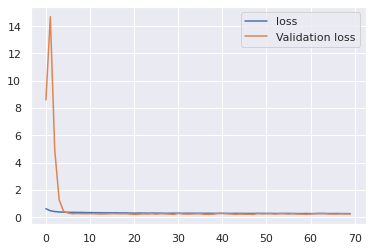

In [ ]:
plt.plot(r.history["loss"], label='loss')
plt.plot(r.history["val_loss"], label='Validation loss')
plt.legend()

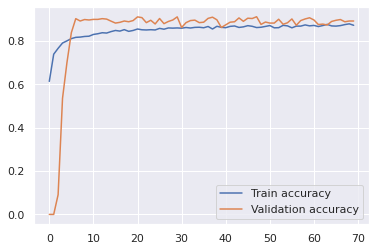

In [ ]:
plt.plot(r.history["accuracy"], label='Train accuracy')
plt.plot(r.history["val_accuracy"], label='Validation accuracy')
plt.legend()

In [ ]:
model.evaluate(X_train_scaled_strip, Y_train_strip)


preds = model.predict(X_train_scaled_strip)

th = 0.1
classes = np.copy(preds)

classes[preds > th] = 1
classes[preds <= th] = 0

cm = confusion_matrix(Y_train_strip, classes)
cm

154/154 [==============================] - 0s 2ms/step - loss: 0.2346 - accuracy: 0.8927


array([[ 528,  700],
       [  26, 3658]])

## TEST SET EVALUATION

In [ ]:
# Test
preds = model.predict(X_test_scaled)

th = 0.5
classes = np.copy(preds)

classes[preds > th] = 1
classes[preds <= th] = 0

cm = confusion_matrix(Y_test, classes)

cmsum = np.sum(cm)

acc = (cm[0, 0] + cm[1,1])/cmsum
sen = (cm[0, 0])/(cm[0, 0] + cm[0, 1])
spec = (cm[1, 1])/(cm[1, 0] + cm[1, 1])

print("Accuracy: ", acc)
print("Sensitivity: ", sen)
print("Specificity: ", spec)

Accuracy:  0.9609040135082478
Sensitivity:  0.0
Specificity:  1.0


In [ ]:
cm

array([[   0,  301],
       [   0, 7398]])

In [ ]:
model.evaluate(X_test_scaled, Y_test)

241/241 [==============================] - 0s 2ms/step - loss: 6.2552 - accuracy: 0.9609


[6.255239009857178, 0.9609040021896362]

In [ ]:
np.any(preds < 1.)

False